# Projeto 1

## Luiz Vitor Germanos Teixeira

### Pergunta:
### Paises que recebem auxilio internacional tem crescimento no seu IDH? O seu índice de democracia tem algum impacto neste crescimento?



### Dados utilizados:
### IDH
### Índice de democracia
### Ajuda monetária Internacional por pessoa


## Método:
### Este projeto vai analizar uma facha de tempo de 5 anos, começando em 1995 e terminando em 2000. Como o Indice de democracia utilizado é o Polity IV dataset, as nações serão classificadas de acordo com o seguinte sistema de rankeamento:
### Paises com um indice de -10 até -6, autocracia
### Paises com um indice de -5 até 0, anocracia fechada
### Paises com um indice de 1 até 5, anocracia aberta
### Paises com um indice de 6 até 9, democracia
### Paises com um indice de 10, democracia plena

### A analize será feita da seguinte maneira, cada classificação recebera uma cor, depois será calculada a variação do IDH dos países em um periodo de 5 anos e o somatorio de ajuda financeira tambem no mesmo periodo. Com esses dados sera montado um grafico para checar se existe alguma correlaçao entre o grau de democracia do país e o efeito da ajuda no crescimento do seu IDH.

## Importando bibliotecas e criando funções

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    #fig = plt.figure(figsize=(11, 6))
    #plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    #plt.tight_layout()

In [2]:
IndiceDemocracia = pd.read_excel('democracy_score_use_as_color.xlsx')
IDH = pd.read_excel('hdi_human_development_index.xlsx')
Aid = pd.read_excel('aid_received_total_us_inflation_adjusted.xlsx')
Aidperp = pd.read_excel("aid_received_per_person_current_us.xlsx")

## Selecionado o intervalo a ser estudado e limpando a database:

In [3]:
IDH_idx = IDH.set_index('geo')
anos = str.split(str(np.arange(1990,2011,1)))
IDHa = IDH_idx.loc[:,[1995, 1996, 1997, 1998, 1999, 2000]]
IDHa.head()

,1995,1996,1997,1998,1999,2000
geo,,,,,,
Afghanistan,0.324,0.328,0.332,0.335,0.338,0.340
Albania,0.628,0.637,0.636,0.646,0.656,0.662
Algeria,0.600,0.609,0.617,0.627,0.636,0.644
Andorra,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,0.382,0.391


In [4]:

Aidperp_idx = Aidperp.set_index('geo')
Aidperpa = Aidperp_idx.loc[:,[1995, 1996, 1997, 1998, 1999, 2000]]
Aidperpa.head()


,1995,1996,1997,1998,1999,2000
geo,,,,,,
Afghanistan,12.4,9.52,12.60,8.7,7.36,6.77
Albania,56.7,71.50,53.40,85.9,157.00,103.00
Algeria,10.2,10.40,8.29,13.8,4.48,6.41
Angola,29.2,31.30,23.50,21.6,24.30,18.40
Antigua and Barbuda,30.8,51.20,56.00,125.0,132.00,118.00


In [5]:

IndiceDemocracia.head()
IndiceDemocracia_idx = IndiceDemocracia.set_index('geo')
IndiceDemocraciaa = IndiceDemocracia_idx.loc[:,[1995, 1996, 1997, 1998, 1999, 2000]]
IndiceDemocracia1995 = IndiceDemocracia_idx.loc[:,[1995]]

In [6]:
data = IDHa.join(Aidperpa, how='inner',lsuffix='_IDH', rsuffix='_Aid')
datia = data.join(IndiceDemocraciaa, how="inner",rsuffix='_Demo',lsuffix='_Aid' )
dados = datia.dropna()
dados

,1995_IDH,1996_IDH,1997_IDH,1998_IDH,1999_IDH,2000_IDH,1995_Aid,1996_Aid,1997_Aid,1998_Aid,1999_Aid,2000_Aid,1995,1996,1997,1998,1999,2000
geo,,,,,,,,,,,,,,,,,,
Afghanistan,0.324,0.328,0.332,0.335,0.338,0.340,12.400,9.520,12.6000,8.700,7.360,6.77,0.0,-7.0,-7.0,-7.0,-7.0,-7.0
Albania,0.628,0.637,0.636,0.646,0.656,0.662,56.700,71.500,53.4000,85.900,157.000,103.00,5.0,0.0,5.0,5.0,5.0,5.0
Algeria,0.600,0.609,0.617,0.627,0.636,0.644,10.200,10.400,8.2900,13.800,4.480,6.41,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
Argentina,0.731,0.738,0.746,0.753,0.764,0.771,4.090,3.710,2.8600,2.360,2.320,1.63,7.0,7.0,7.0,7.0,8.0,8.0
Armenia,0.603,0.609,0.618,0.632,0.639,0.644,67.700,92.300,53.1000,62.500,67.700,70.30,3.0,-6.0,-6.0,5.0,5.0,5.0
Azerbaijan,0.609,0.610,0.615,0.626,0.636,0.642,15.600,12.400,23.5000,15.200,21.400,17.50,-6.0,-6.0,-6.0,-7.0,-7.0,-7.0
Bahrain,0.775,0.778,0.779,0.783,0.786,0.794,177.000,229.000,253.0000,325.000,97.200,90.90,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
Bangladesh,0.423,0.432,0.441,0.450,0.459,0.468,10.800,10.100,8.1700,9.200,9.450,8.92,6.0,6.0,6.0,6.0,6.0,6.0
Benin,0.371,0.375,0.380,0.384,0.389,0.395,47.500,47.300,35.2000,31.700,31.900,35.60,6.0,6.0,6.0,6.0,6.0,6.0


In [7]:
datia.to_excel( 'Projeto1dataframe2.xlsx', index=True)

## Classificando os  Países

In [8]:
def categoria(x):
    if x == 10:
        return 'Full Democracy'
    elif x >= 6:
        return 'Medium'
    elif x >= 1:
        return 'Anocracy'
    elif x >= -5:
        return 'Closed Anocracy'
    else:
        return "Autocracy"

In [9]:
dados[1995] = dados[1995].apply(categoria)
dados[1996] = dados[1996].apply(categoria)
dados[1997] = dados[1997].apply(categoria)
dados[1998] = dados[1998].apply(categoria)
dados[1999] = dados[1999].apply(categoria)
dados[2000] = dados[2000].apply(categoria)
IndiceDemocracia1995[1995] = IndiceDemocracia1995[1995].apply(categoria)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

## Criando um novo dataframe para a analise

In [10]:
Total = dados
TotalIDH = Total["2000_IDH"] - Total["1995_IDH"]
TotalAid = Total["2000_Aid"] + Total["1995_Aid"] + Total["1996_Aid"] + Total["1997_Aid"] + Total["1998_Aid"] + Total["1999_Aid"]
Totalsum = pd.concat([TotalAid, TotalIDH], axis = 1)
Totalsum = Totalsum.join(IndiceDemocracia1995, how="inner")
Totalsum.columns = ['Ajudatotal5anos', 'DeltaIDH', 'Governo']
Totalsum.head()
#plt.scatter(TotalAid,TotalIDH,c="#7B68EE",alpha=0.8)

,Ajudatotal5anos,DeltaIDH,Governo
geo,,,
Afghanistan,57.35,0.016,Closed Anocracy
Albania,527.50,0.034,Anocracy
Algeria,53.58,0.044,Closed Anocracy
Argentina,16.97,0.040,Medium
Armenia,413.60,0.041,Anocracy


In [11]:
#Totalsum.to_excel( 'Totalsum.xlsx', index=True)

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.02447904255039285
Coeficiente angular: 5.749302888142393e-05
Ajuste linear entre X3 e X4:
Coeficiente linear: 0.023312154282001684
Coeficiente angular: -7.0109974199505365e-06
Ajuste linear entre X3 e X4:
Coeficiente linear: 0.03332163037786084
Coeficiente angular: -1.2483810023360262e-05
Ajuste linear entre X3 e X4:
Coeficiente linear: 0.02400135563095769
Coeficiente angular: -1.1994097094982405e-05
Ajuste linear entre X3 e X4:
Coeficiente linear: 0.02798738377620176
Coeficiente angular: -8.727080155892779e-06


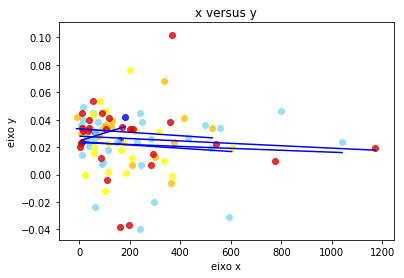

In [12]:
governos = ['Full Democracy', "Medium", "Anocracy", "Closed Anocracy", "Autocracy"]

cores = ["#0000FF", "#81DAF5", "#FFBF00","#FFFF00", "#DF0101"]

for e in range(5):
    dedo = Totalsum[Totalsum['Governo']==governos[e]]
    cor = cores[e]
    reta(dedo["Ajudatotal5anos"],dedo["DeltaIDH"])
    plt.scatter(dedo["Ajudatotal5anos"],dedo["DeltaIDH"],c=cor,alpha=0.8)

## Conclusão

### Como visto no grafico não se pode deduzir que o indice de democracia tem um impacto no efeito da ajuda monetaria. Isto talvez se de pelo fato de que paises que acabam recebendo este tipo de ajuda estão passando por alguma crise ou guerra, então acaba que a ajuda apenas compensa o defit 